In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ecephys import xrsig
import ecephys.plot as eplt
import ecephys_analyses as ea

import matplotlib.pyplot as plt
import seaborn as sns

import xarray as xr
xr.set_options(keep_attrs=True)

In [113]:
subject = "Alessandro"
experiment = "dexmedetomidine-eStim"
condition = "all"

spg = ea.load.load_spectrogram(subject, experiment, condition)
bp = ea.load.load_bandpower(subject, experiment, condition)

In [114]:
spg = spg.rolling(time=10, center=True).mean()
bp = bp.rolling(time=10, center=True).mean()

In [115]:
def plot_spectrogram_with_bandpower(spg, bp, title=None, figsize=(32, 5)):
    fig, (bp_ax, spg_ax) = plt.subplots(ncols=1, nrows=2, figsize=figsize, gridspec_kw=dict(width_ratios=[1], height_ratios=[1, 1]))
    
    sns.lineplot(x=bp.datetime.values, y=bp.values, color='black', ax=bp_ax)
    bp_ax.set(xlabel=None, ylabel="Bandpower", xticks=[], xmargin=0)
    
    eplt.plot_spectrogram(spg.frequency.values, spg.datetime.values, spg.values, yscale="linear", f_range=(0, 20), ax=spg_ax)

    if title:
        fig.suptitle(title)
    plt.tight_layout(h_pad=0.0)

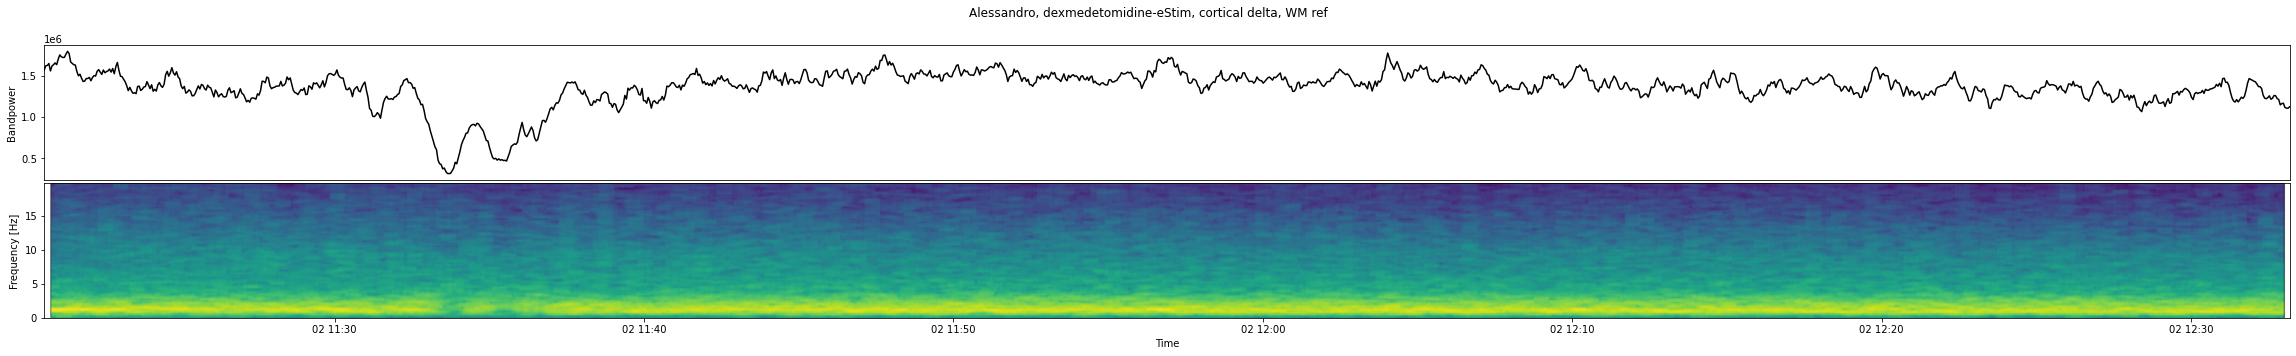

In [116]:
plot_spectrogram_with_bandpower(spg.mpta_wm_ref, bp.mpta_delta_wm_ref, title=f"{subject}, {experiment}, cortical delta, WM ref")

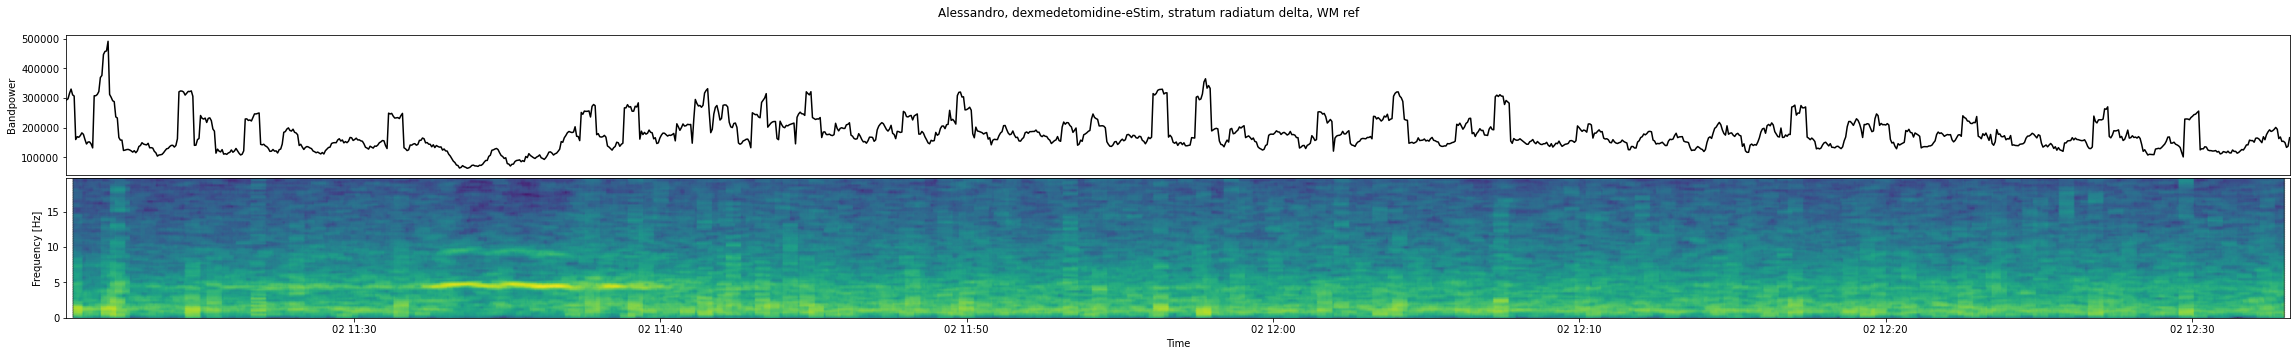

In [117]:
plot_spectrogram_with_bandpower(spg.sr_wm_ref, bp.sr_delta_wm_ref, title=f"{subject}, {experiment}, stratum radiatum delta, WM ref")